# Part 1: Data Preprocessing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.shape

(414, 8)

In [4]:
x = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

In [5]:
y2 = y.rename({'Y house price of unit area':'Y'})
y2.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [6]:
x.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [7]:
x2 = x.copy().rename(columns = {'X1 transaction date':'X1', 'X2 house age':'X2', 'X3 distance to the nearest MRT station':'X3', 'X4 number of convenience stores':'X4', 'X5 latitude':'X5', 'X6 longitude':'X6'})
x2.head()

,No,X1,X2,X3,X4,X5,X6
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [8]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)
x2_train.head()

,No,X1,X2,X3,X4,X5,X6
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228
194,195,2013.500,15.2,3771.89500,0,24.93363,121.51158
19,20,2012.667,1.5,23.38284,7,24.96772,121.54102
176,177,2012.833,13.9,4573.77900,0,24.94867,121.49507
367,368,2012.833,15.0,1828.31900,2,24.96464,121.51531


In [9]:
x2_test.head()

,No,X1,X2,X3,X4,X5,X6
358,359,2013.167,1.1,193.5845,6,24.96571,121.54089
350,351,2013.000,13.2,492.2313,5,24.96515,121.53737
373,374,2013.083,0.0,274.0144,1,24.97480,121.53059
399,400,2012.917,12.7,170.1289,1,24.97371,121.52984
369,370,2012.667,20.2,2185.1280,3,24.96322,121.51237


In [10]:
y2_train.head()

7      46.7
194    29.3
19     47.7
176    19.2
367    20.9
Name: Y house price of unit area, dtype: float64

In [11]:
y2_test.head()

358    45.1
350    42.3
373    52.2
399    37.3
369    22.8
Name: Y house price of unit area, dtype: float64

# Standardizing with Z-score scalling

In [12]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

x2_scaled = s.fit_transform(x2_train)

In [13]:
# Convert the scaled array to a DataFrame
x2_scaled_df = pd.DataFrame(x2_scaled, columns=x2_train.columns)

# Display the first few rows using .head()
x2_scaled_df.head()

,No,X1,X2,X3,X4,X5,X6
0,-1.761574,0.895693,0.250416,-0.624514,0.611260,0.866555,0.581611
1,-0.138622,1.189638,-0.197615,2.171182,-1.399983,-2.875917,-1.454166
2,-1.657428,-1.760432,-1.401148,-0.836516,0.946468,-0.149247,0.498058
3,-0.294842,-1.172543,-0.311819,2.814590,-1.399983,-1.672951,-2.548977
4,1.362826,-1.172543,-0.215185,0.611713,-0.729569,-0.395599,-1.206823


# Part 2: Linear Regression

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(x2_scaled, y2_train)

# Make predictions on the testing data
y2_pred = lr.predict(x2_test)

#Calcuate Coefficients and Intercept
coefficients = lr.coef_
intercept = lr.intercept_

coefficients
intercept
# Calculate Mean Squared Error and R-squared Error
mse = mean_squared_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)

# Print the coefficients, Intercept, MSE and r-squared
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
print("Mean Squared Error:", mse)
print(f"R-squared: {r2:.2f}")


Coefficients: [-0.72123507  1.65460419 -2.72645031 -6.51757473  3.17693966  2.95217602
 -0.821401  ]
Intercept: 38.44186851211001
Mean Squared Error: 88712513.68855453
R-squared: -530496.55


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Regression Equation

In [15]:
equation_parts = [f"{coefficients:.4f} * x2_{i+1}" for i, coefficients in enumerate(coefficients)]
equation = f"y2 = {intercept:.4f} + {' + '.join(equation_parts)}"
equation

'y2 = 38.4419 + -0.7212 * x2_1 + 1.6546 * x2_2 + -2.7265 * x2_3 + -6.5176 * x2_4 + 3.1769 * x2_5 + 2.9522 * x2_6 + -0.8214 * x2_7'

# Part 3: Feature Scaling Comparison


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model_no_scaling = LinearRegression()

# Train the model
model_no_scaling.fit(x2_train, y2_train)

# Make predictions on the test set
y2_pred_no_scaling = model_no_scaling.predict(x2_test)

# Calculate evaluation metrics
mse_no_scaling = mean_squared_error(y2_test, y2_pred_no_scaling)
r2_no_scaling = r2_score(y2_test, y2_pred_no_scaling)

print(f"Mean Squared Error (No Scaling): {mse_no_scaling}")
print(f"R-squared (No Scaling): {r2_no_scaling}")


Mean Squared Error (No Scaling): 74.70865668115019
R-squared (No Scaling): 0.5532450005316822


# Part 4: Visualization and Analysis

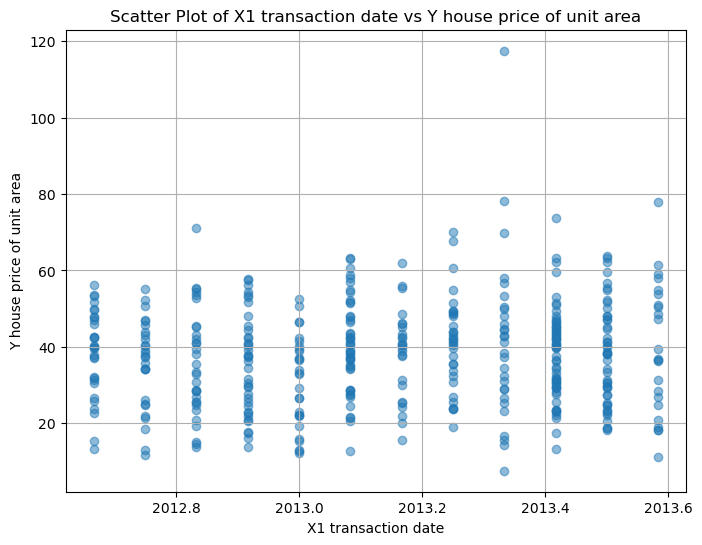

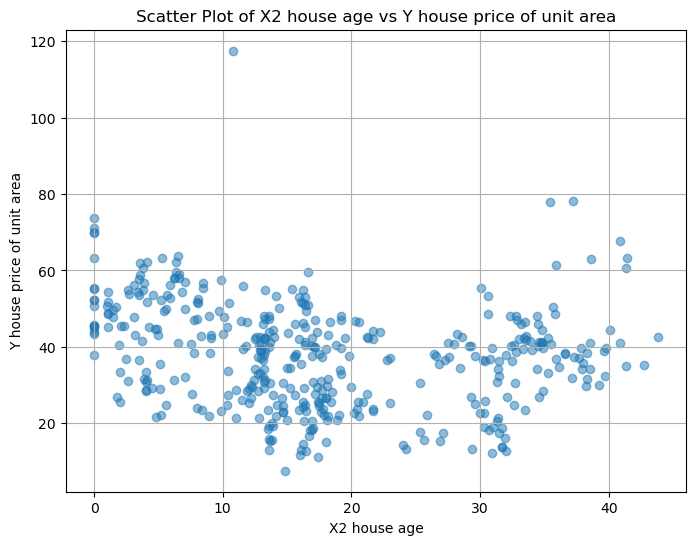

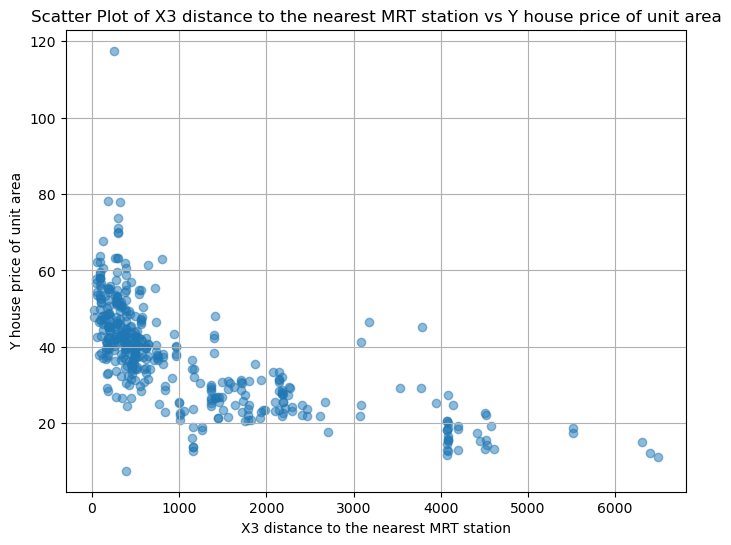

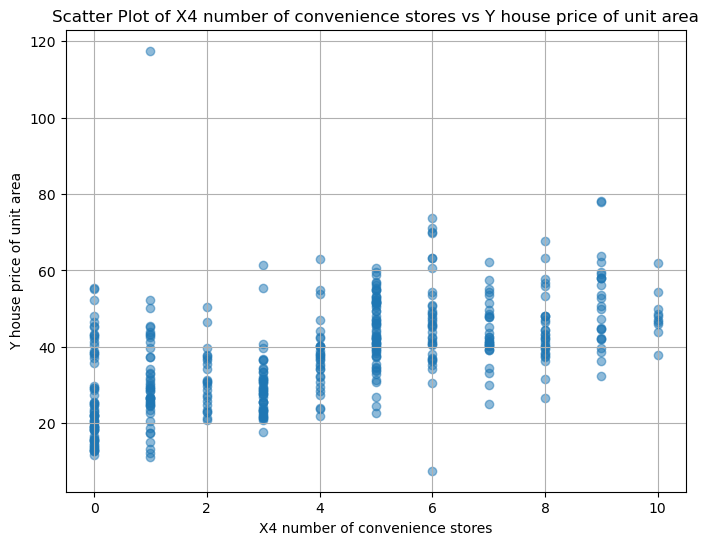

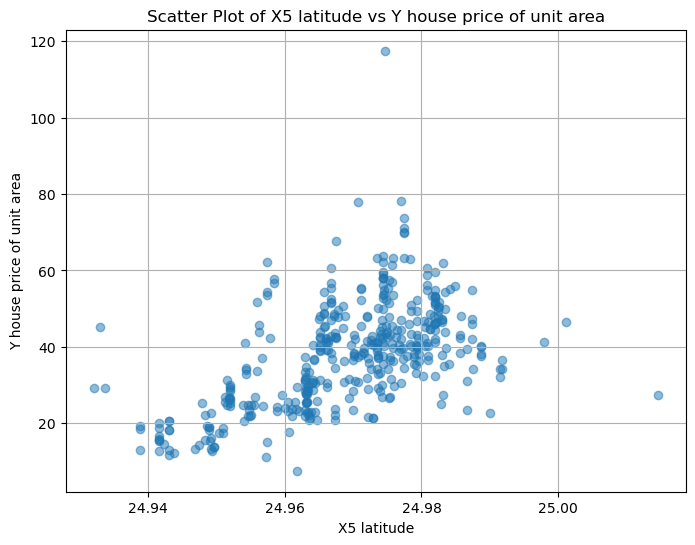

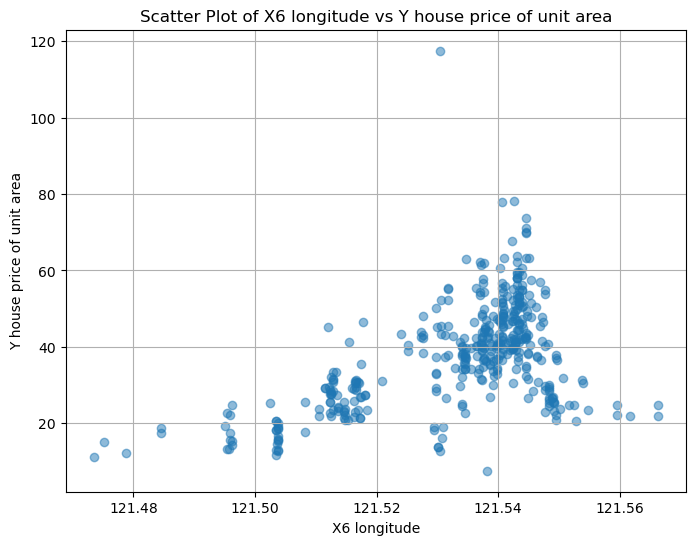

In [17]:
import matplotlib.pyplot as plt

features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
target = 'Y house price of unit area'

for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)  # Use df[feature] instead of x2[feature]
    plt.title(f'Scatter Plot of {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid()
    plt.show()

# Part 5: Advanced Problem (Optional)

In [18]:
from sklearn.preprocessing import MinMaxScaler

x3 = x2_train.copy()
# Extract the columns x1 to x6
columns_to_scale = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
x3_data = x3[columns_to_scale]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the x data
scaled_x3 = scaler.fit_transform(x3_data)

# Create a DataFrame with the scaled values
scaled_x3_df = pd.DataFrame(scaled_x3, columns=columns_to_scale)

# Display the scaled data
scaled_x3_df.head()

,X1,X2,X3,X4,X5,X6
0,0.818777,0.475410,0.042055,0.6,0.577940,0.736692
1,0.909389,0.355972,0.596634,0.0,0.000000,0.399737
2,0.000000,0.035129,0.000000,0.7,0.421072,0.722862
3,0.181223,0.325527,0.724266,0.0,0.185771,0.218527
4,0.181223,0.351288,0.287283,0.2,0.383029,0.440676
